
# Jupiter/IPython notebook widgets

<br />

### Ivan Zimine 
### vanzaj@{gmail,fb,tw,github}

<br />

### PyDataSG meetup, 13 Oct 2015


In [1]:
# skipped slide doesn't mean we can't import stuff...

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML, display
import ipywidgets as wdg

def embed_url(url, width=800, height=450):
    src='<iframe src="%s"  width="%d" height="%d"></iframe>' % (url, 800, 450)
    display(HTML(src))

In [2]:
# load 3D anatomy volume and recast it from floats to origial data type
import nibabel as nib
nimg = nib.load('../data/anon_anatomy.nii.gz')
data = nimg.get_data().astype(nimg.get_data_dtype())

Data info: <class 'numpy.ndarray'> uint8 (57, 67, 56)


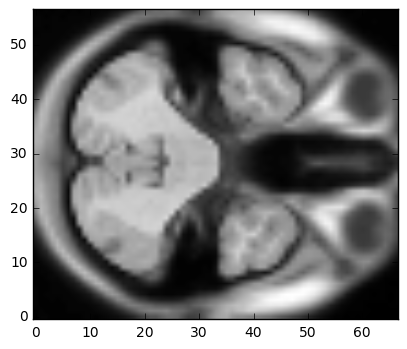

In [3]:
print("Data info:", type(data), data.dtype, data.shape)
 
plt.set_cmap('gray');
plt.imshow( data[:, :, 10], origin='lower');

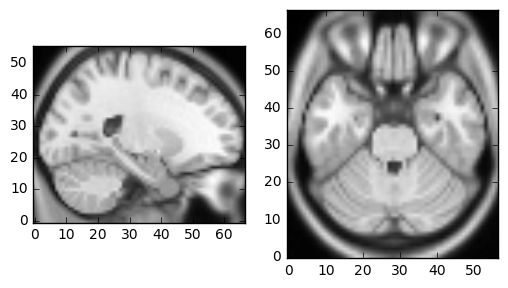

In [4]:
# helper display function
def show_vol(axe1=0, axe2=0):
    plt.subplot(121)
    im = data[axe1, :,:]
    plt.imshow(im.T, origin='lower')
    
    plt.subplot(122)
    im = data[:, :, axe2]
    plt.imshow(im.T, origin='lower')
    
show_vol(20, 15)

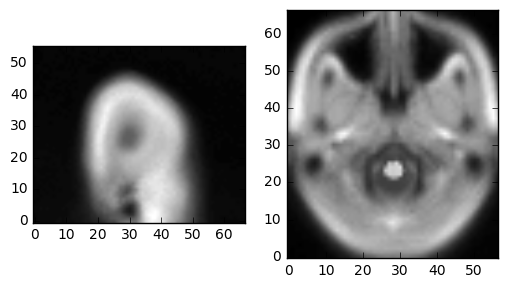

In [5]:
Nx, Ny, Nz = data.shape

wdg.interact(show_vol, axe1=(0, Nx-1), axe2=(0, Nz-1))

# code cells + markdown = ❤ ❤ ❤

everybody loves math: $ax^2 + bx + c =0$

In [6]:
print("Saluton mondo!")

Saluton mondo!


In [7]:
! python -m this | head -5 | tail -3

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.


In [8]:
embed_url('https://en.wikipedia.org/wiki/Literate_programming')

In [9]:
embed_url('https://www.oreilly.com/ideas/jupyter-at-oreilly')

In [10]:
embed_url('http://worrydream.com/ExplorableExplanations/')

In [11]:
print(2 + 2)

4


In [12]:
# widgets basics
import ipywidgets as wdg

In [13]:
def f(x=1):
    print('OMG!' * x)

In [16]:
wdg.interact(f, x=(1,15))

OMG!


<function __main__.f>

In [17]:
# explicit widget control

wdg.interact(f, x=wdg.IntSlider(min=1, max=10, step=1, value=5))

OMG!OMG!OMG!OMG!OMG!


<function __main__.f>

In [18]:
# interact as a decorator

@wdg.interact(text='')
def h(text=''):
    res = ' '.join(np.random.permutation(text.split()))
    print(res)

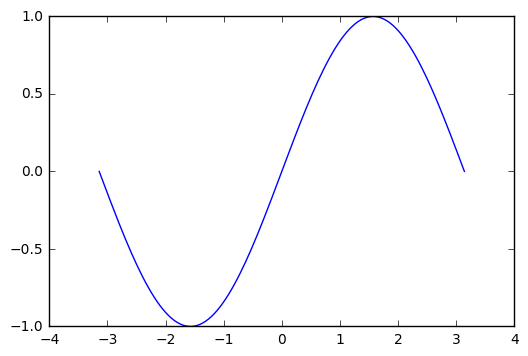

In [19]:
x = np.linspace(-np.pi, np.pi, 128)

@wdg.interact(freq=(1,10))
def plot_sine(freq=1):
    y = np.sin(x*freq)
    plt.plot(x, y)

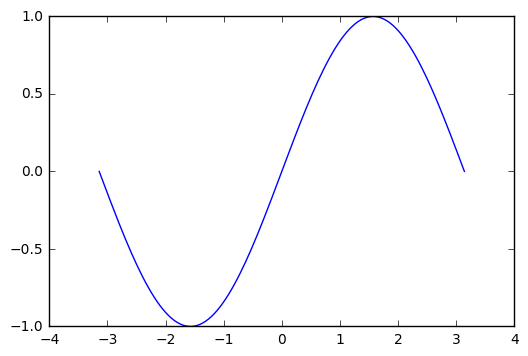

In [20]:
# sane defaults: slider for numbers, checkbox for booleans,...

@wdg.interact(freq=(1,10), show_y1=False)
def plot_sine(freq=1, show_y1=False):
    y = np.sin(x*freq)
    plt.plot(x, y)
    if show_y1:
        y1 = 0.5 * np.cos(x*freq)
        plt.plot(x, y1)

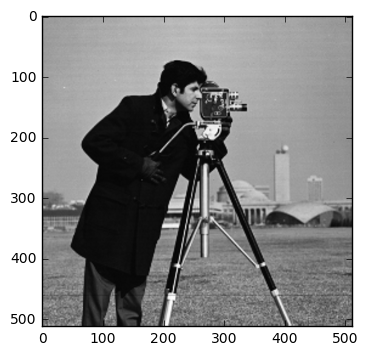

In [21]:
import skimage.data

img = skimage.data.camera()
plt.imshow(img, cmap=plt.get_cmap('gray'))

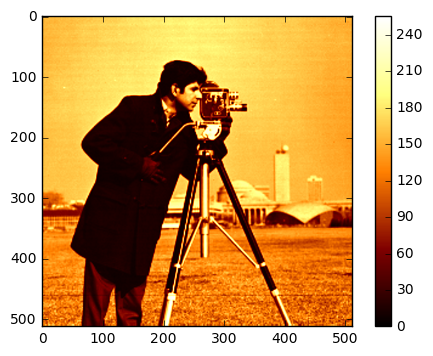

In [22]:
cnames = [name for name in plt.colormaps() if not name.endswith('_r') and name[0] > 'Z']

@wdg.interact(cname=cnames)
def showimg(cname=''):
    plt.imshow(img, cmap=plt.get_cmap(cname))
    plt.colorbar()

10

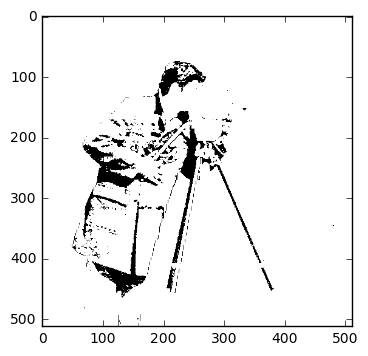

In [23]:
# `interactive` vs `interact`

def img_thres(thres=10):
    msk = img > thres
    plt.imshow(msk)
    return thres

iw = wdg.interactive(img_thres, thres=(0,255))
display(iw)

In [24]:
# return value of `img_thres`

print(iw.result)

10


In [52]:
import pandas as pd

df = pd.read_csv("../data/2013-Nov_chicago-salaries.csv.gz", compression='gzip')
df.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$75372.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$80916.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$99648.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,$89440.00


In [53]:
df.columns = ['name', 'title', 'department', 'salary']
df.salary = df.salary.str.replace('$', '').astype(float)
df.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


In [55]:
def sortdf(column='name', ascend=True):
    newdf = df.sort(column, ascending=ascend).head(10)
    return newdf

colnames = list(df.columns)
wdg.interact(sortdf, column=colnames, ascend=False)

/Users/ivan/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,name,title,department,salary
13845,"KOCH, STEVEN",ADMINISTRATIVE SECRETARY,MAYOR'S OFFICE,0.96
22390,"RODRIGUEZ, ALBA",SENIOR COMPANION,FAMILY & SUPPORT,2756.00
11352,"HILL, ROOSEVELT",SENIOR COMPANION,FAMILY & SUPPORT,2756.00
24726,"SMOLOVSKY, ALEXANDER",SENIOR COMPANION,FAMILY & SUPPORT,2756.00
4170,"CHENG, MEE OI",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00
5615,"DABKOVICH, RUTH C",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00
2580,"BRIDGES, THELMA K",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00
27208,"VERNIKOV, YAKOV N",SENIOR COMPANION,FAMILY & SUPPORT,2756.00
25659,"SWANIGAN, LENORA",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.00
1659,"BELL, FLORA D",SENIOR COMPANION,FAMILY & SUPPORT,2756.00


In [56]:
# basic control of widgets layout

iw = wdg.interactive(sortdf, 
                     ascend=wdg.Checkbox(description="Ascend:", value=True),
                     column=wdg.Dropdown(description="Column:", options=colnames, value='name'))

ctrl = wdg.HBox(sorted(iw.children))
# auto-exec sortdf when the widget is rendered 1st time
ctrl.on_displayed(lambda x: sortdf(**iw.kwargs))
display(ctrl)

TypeError: unorderable types: Checkbox() < Dropdown()

In [ ]:
def sub_df(columns='name,title', ascend=True):
    try:
        fields = columns.split(',')
        if len(fields) > 0:
            newdf = df[fields].head(10)
    except Exception:
        newdf = df
    display(newdf)
    
wdg.interact(sub_df, column='', ascend=True)